In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

# refine this 

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
argentina_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]

In [5]:
argentina_df_ind4.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [6]:
ts = argentina_df_ind4['Value'] 
ts1 = argentina_df_ind4[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,12.711001
2015-01-01,11.008468
2014-01-01,14.409819
2013-01-01,14.617173
2012-01-01,16.237859


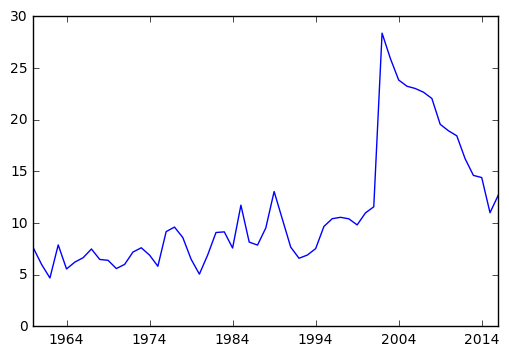

In [7]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


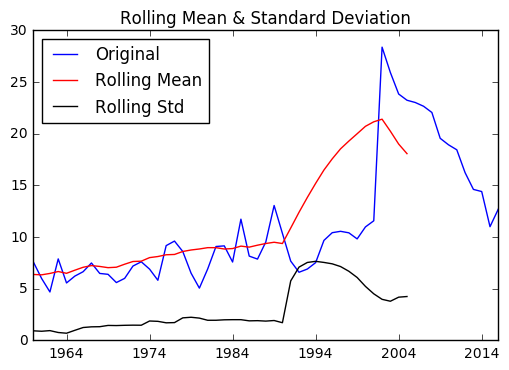

Results of Dickey-Fuller Test:
Test Statistic                 -1.743712
p-value                         0.408743
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (10%)           -2.595137
Critical Value (5%)            -2.914731
dtype: float64


In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts)

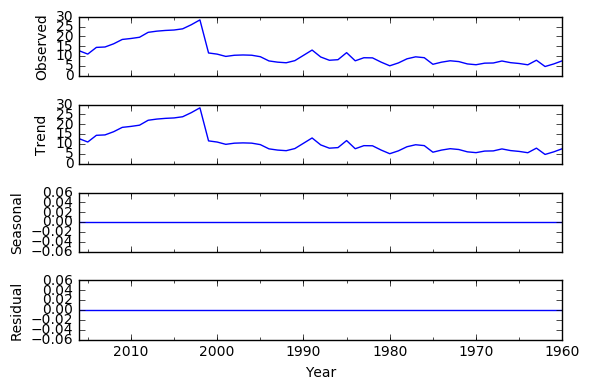

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


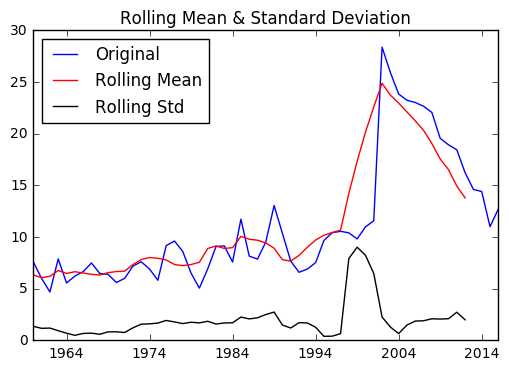

Results of Dickey-Fuller Test:
Test Statistic                 -1.743712
p-value                         0.408743
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (10%)           -2.595137
Critical Value (5%)            -2.914731
dtype: float64


In [11]:
test_stationarity(ts1.Value)

In [12]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

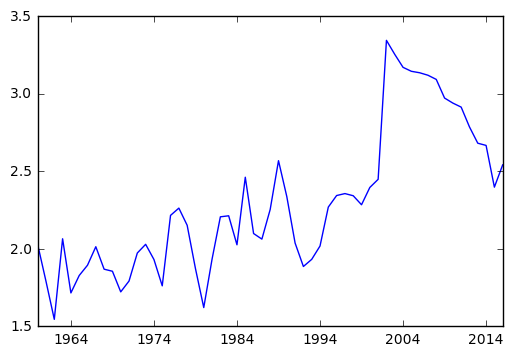

In [13]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


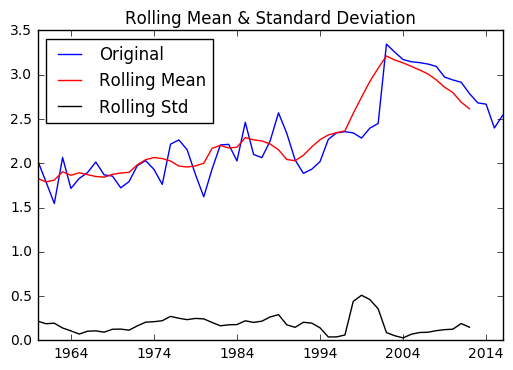

Results of Dickey-Fuller Test:
Test Statistic                 -1.846175
p-value                         0.357790
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (10%)           -2.595137
Critical Value (5%)            -2.914731
dtype: float64


In [14]:
test_stationarity(ts1_log.Value)

In [15]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


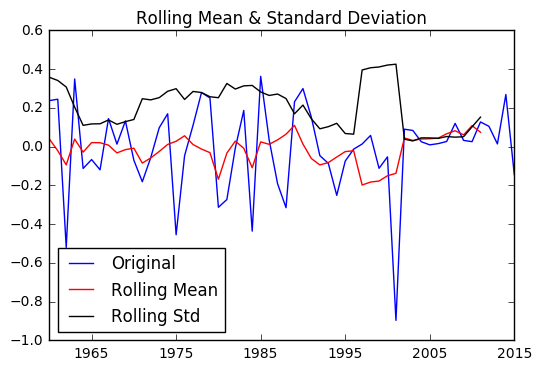

Results of Dickey-Fuller Test:
Test Statistic                -5.663096e+00
p-value                        9.282798e-07
#Lags Used                     2.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (10%)          -2.596796e+00
Critical Value (5%)           -2.917850e+00
dtype: float64


In [16]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

In [17]:
def firstDifference(df):
    ts_first_diff = df - df.shift()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


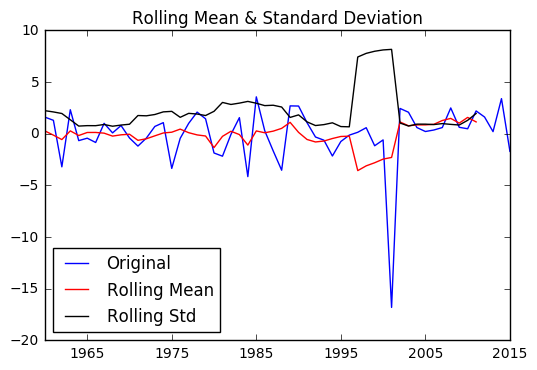

Results of Dickey-Fuller Test:
Test Statistic                -7.946712e+00
p-value                        3.205479e-12
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (10%)          -2.595670e+00
Critical Value (5%)           -2.915731e+00
dtype: float64


In [18]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

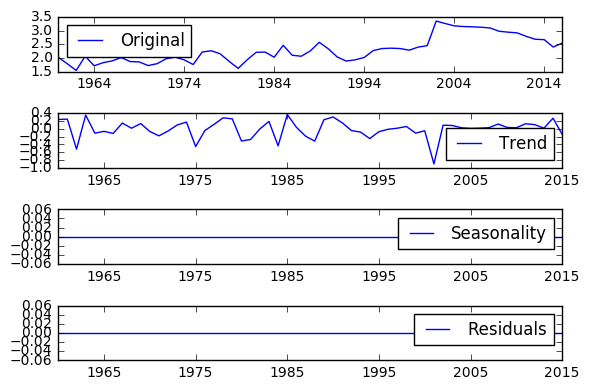

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [20]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

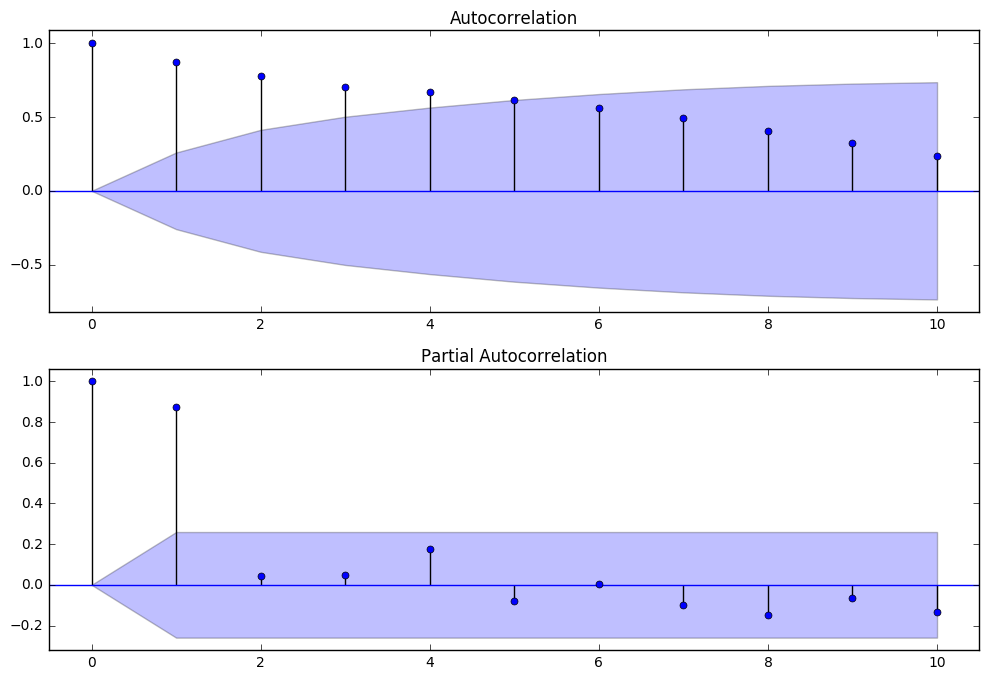

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

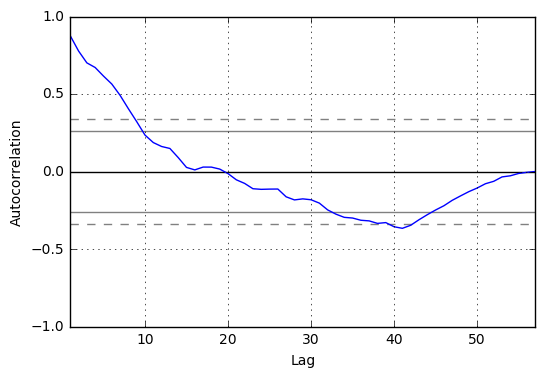

In [22]:
autocorrelation_plot(ts1_log)
plt.show()

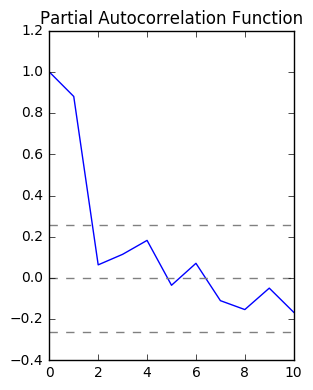

In [23]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [24]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [25]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [26]:
def AR_Model(ts):
    model = ARIMA(ts, order=(1, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 1
Coefficients: const          2.290477
ar.L1.Value    0.871005
dtype: float64
2006-01-01    20.361069
Freq: -1AS-JAN, dtype: float64
-3.5851425849671443


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


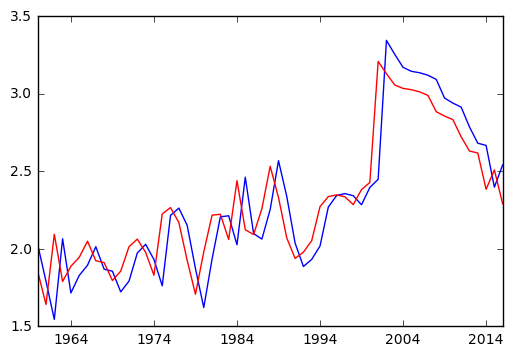

In [27]:
model_AR = AR_Model(ts1_log)

In [28]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 9))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 9))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          2.266694
ma.L1.Value    0.726283
ma.L2.Value    0.429776
ma.L3.Value    0.288805
ma.L4.Value    0.529237
ma.L5.Value    0.414105
ma.L6.Value    0.632035
ma.L7.Value    0.679478
ma.L8.Value    0.513516
ma.L9.Value    0.533833
dtype: float64


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1390: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 9)   Log Likelihood                   7.467
Method:                       css-mle   S.D. of innovations              0.195
Date:                Sat, 19 Aug 2017   AIC                              7.065
Time:                        00:20:23   BIC                             29.539
Sample:                    01-01-2016   HQIC                            15.799
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.2667      0.139     16.283      0.000         1.994     2.540
ma.L1.Value     0.7263        nan        nan        nan           nan       nan
ma.L2.Value     0.4298        nan        nan    

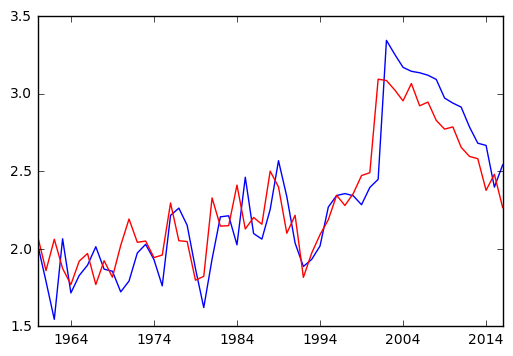

In [29]:
model_MA = MA_Model(ts1_log)

In [30]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(1, 0, 9))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(10,0, 9))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 1
Coefficients: const          2.278602
ar.L1.Value    0.507701
ma.L1.Value    0.219666
ma.L2.Value    0.144251
ma.L3.Value    0.126777
ma.L4.Value    0.382680
ma.L5.Value    0.244320
ma.L6.Value    0.442159
ma.L7.Value    0.381709
ma.L8.Value    0.277233
ma.L9.Value    0.273033
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(1, 9)   Log Likelihood                   8.579
Method:                       css-mle   S.D. of innovations              0.198
Date:                Sat, 19 Aug 2017   AIC                              6.842
Time:                        00:20:28   BIC                             31.359
Sample:                    01-01-2016   HQIC                            16.370
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% 

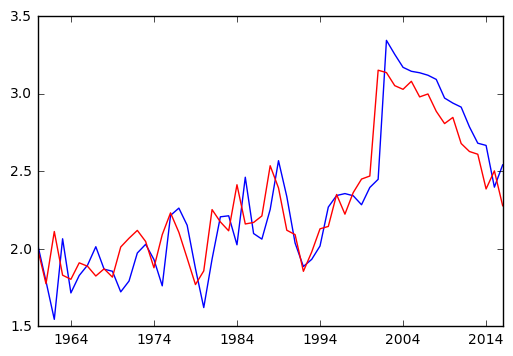

In [31]:
model_Combined = Combined_Model(ts1_log)

In [32]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2, 0, 0))


In [33]:
aic_metric

,AIC,Modelname
0,-3.585143,"ARIMA(ts, order=(2, 0, 0))"
0,7.065309,"ARIMA(ts, order=(0, 0, 9))"
0,6.842291,"ARIMA(ts, order=(10,0, 9))"


In [34]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    print(output)
    return output

In [35]:
output_forecast = forecast(model_AR,5)

[ 7.86522689  8.10001282  8.31021596  8.49774379  8.66452619]


In [44]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    #fittedVal=fittedVal-20
    PredictedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    
    return PredictedVal
FittedValues(model_Combined)

Predicted existing values are:


Year
2016-01-01     9.763018
2015-01-01    12.228672
2014-01-01    10.881398
2013-01-01    13.612799
2012-01-01    13.853581
2011-01-01    14.587434
2010-01-01    17.261922
2009-01-01    16.590142
2008-01-01    17.957659
2007-01-01    20.082735
2006-01-01    19.706734
2005-01-01    21.792184
2004-01-01    20.694867
2003-01-01    21.188917
2002-01-01    23.053919
2001-01-01    23.409076
2000-01-01    11.827443
1999-01-01    11.597565
1998-01-01    10.629695
1997-01-01     9.247828
1996-01-01    10.498607
1995-01-01     8.543710
1994-01-01     8.413841
1993-01-01     7.246684
1992-01-01     6.395925
1991-01-01     8.104555
1990-01-01     8.337328
1989-01-01    10.952197
1988-01-01    12.639849
1987-01-01     9.142648
1986-01-01     8.765806
1985-01-01     8.681047
1984-01-01    11.181163
1983-01-01     8.306493
1982-01-01     8.796634
1981-01-01     9.524243
1980-01-01     6.412186
1979-01-01     5.872266
1978-01-01     6.958114
1977-01-01     8.225192
1976-01-01     9.325404
1975-01-01 

In [43]:
print(range(1999,2005))

range(1999, 2005)
